##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE215120**

file previously downloaded:
GSE215120_RAW.tar

unzipped using 
``` bash
tar -xvf GSE215120_RAW.tar
```

This gives the following files: 
* GSM6622292_AM1_filtered_feature_bc_matrix.h5
* GSM6622293_AM2_filtered_feature_bc_matrix.h5
* GSM6622294_AM3_pre_filtered_feature_bc_matrix.h5
* GSM6622295_AM3_post_filtered_feature_bc_matrix.h5
* GSM6622296_AM4_filtered_feature_bc_matrix.h5
* GSM6622297_AM5_filtered_feature_bc_matrix.h5
* GSM6622298_AM6_filtered_feature_bc_matrix.h5
* GSM6622299_CM1_filtered_feature_bc_matrix.h5
* GSM6622300_CM2_filtered_feature_bc_matrix.h5
* GSM6622301_CM3_filtered_feature_bc_matrix.h5
* GSM6622302_CM1_lym_filtered_feature_bc_matrix.h5


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE215120')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE215120"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
library(hdf5r)

In [4]:
#load all datasets
AM1.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM2.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM3_pre.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM3_post.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM4.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM5.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
AM6.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
CM1.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
CM2.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")
CM3.data <- Read10X_h5("GSM6622292_AM1_filtered_feature_bc_matrix.h5")

In [5]:
#Add dataset info to colnames
colnames(AM1.data) <- paste0("GSE215120_AM1_", colnames(AM1.data))
colnames(AM2.data) <- paste0("GSE215120_AM2_", colnames(AM2.data))
colnames(AM3_pre.data) <- paste0("GSE215120_AM3_pre_", colnames(AM3_pre.data))
colnames(AM3_post.data) <- paste0("GSE215120_AM3_post_", colnames(AM3_post.data))
colnames(AM4.data) <- paste0("GSE215120_AM4_", colnames(AM4.data))
colnames(AM5.data) <- paste0("GSE215120_AM5_", colnames(AM5.data))
colnames(AM6.data) <- paste0("GSE215120_AM6_", colnames(AM6.data))
colnames(CM1.data) <- paste0("GSE215120_CM1_", colnames(CM1.data))
colnames(CM2.data) <- paste0("GSE215120_CM2_", colnames(CM2.data))
colnames(CM3.data) <- paste0("GSE215120_CM3_", colnames(CM3.data))

In [6]:
head(colnames(AM1.data))

[1] "GSE215120_AM1_AAACCTGAGCAGCGTA-1" "GSE215120_AM1_AAACCTGAGCCCAATT-1"
[3] "GSE215120_AM1_AAACCTGAGGCGACAT-1" "GSE215120_AM1_AAACCTGAGGGTTCCC-1"
[5] "GSE215120_AM1_AAACCTGCACAGCCCA-1" "GSE215120_AM1_AAACCTGCAGGCAGTA-1"

In [7]:
#create seperate seurat object for each sample
AM1 <- CreateSeuratObject(counts = AM1.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM1@meta.data$sample_type <- "tumour"
AM1@meta.data$cancer_type <- "AcralMEL"
AM1@meta.data$patient_id <- "AM1"
AM1@meta.data$sample_id <- "GSE215120_AM1"

In [8]:
#Repeat for remaining samples

AM2 <- CreateSeuratObject(counts = AM2.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM2@meta.data$sample_type <- "tumour"
AM2@meta.data$cancer_type <- "AcralMEL"
AM2@meta.data$patient_id <- "AM2"
AM2@meta.data$sample_id <- "GSE215120_AM2"

AM3_pre <- CreateSeuratObject(counts = AM3_pre.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM3_pre@meta.data$sample_type <- "tumour"
AM3_pre@meta.data$cancer_type <- "AcralMEL"
AM3_pre@meta.data$patient_id <- "AM3_pre-immunotherapy"
AM3_pre@meta.data$sample_id <- "GSE215120_AM3_pre"

AM3_post <- CreateSeuratObject(counts = AM3_post.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM3_post@meta.data$sample_type <- "tumour"
AM3_post@meta.data$cancer_type <- "AcralMEL"
AM3_post@meta.data$patient_id <- "AM3_post-immunotherapy"
AM3_post@meta.data$sample_id <- "GSE215120_AM3_post"

AM4 <- CreateSeuratObject(counts = AM4.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM4@meta.data$sample_type <- "tumour"
AM4@meta.data$cancer_type <- "AcralMEL"
AM4@meta.data$patient_id <- "AM4"
AM4@meta.data$sample_id <- "GSE215120_AM4"

AM5 <- CreateSeuratObject(counts = AM5.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM5@meta.data$sample_type <- "tumour"
AM5@meta.data$cancer_type <- "AcralMEL"
AM5@meta.data$patient_id <- "AM5"
AM5@meta.data$sample_id <- "GSE215120_AM5"

AM6 <- CreateSeuratObject(counts = AM6.data, project = "GSE215120", min.features = 200)
#add metadata to sample
AM6@meta.data$sample_type <- "tumour"
AM6@meta.data$cancer_type <- "AcralMEL"
AM6@meta.data$patient_id <- "AM6"
AM6@meta.data$sample_id <- "GSE215120_AM6"

CM1 <- CreateSeuratObject(counts = CM1.data, project = "GSE215120", min.features = 200)
#add metadata to sample
CM1@meta.data$sample_type <- "tumour"
CM1@meta.data$cancer_type <- "CutMEL"
CM1@meta.data$patient_id <- "CM1"
CM1@meta.data$sample_id <- "GSE215120_CM1"

CM2 <- CreateSeuratObject(counts = CM2.data, project = "GSE215120", min.features = 200)
#add metadata to sample
CM2@meta.data$sample_type <- "tumour"
CM2@meta.data$cancer_type <- "CutMEL"
CM2@meta.data$patient_id <- "CM2"
CM2@meta.data$sample_id <- "GSE215120_CM2"

CM3 <- CreateSeuratObject(counts = CM3.data, project = "GSE215120", min.features = 200)
#add metadata to sample
CM3@meta.data$sample_type <- "tumour"
CM3@meta.data$cancer_type <- "CutMEL"
CM3@meta.data$patient_id <- "CM3"
CM3@meta.data$sample_id <- "GSE215120_CM3"

In [9]:
head(AM1@meta.data) 

orig.ident nCount_RNA nFeature_RNA sample_type
GSE215120_AM1_AAACCTGAGCAGCGTA-1 GSE215120  34962      5254         tumour     
GSE215120_AM1_AAACCTGAGCCCAATT-1 GSE215120   2788      1032         tumour     
GSE215120_AM1_AAACCTGAGGCGACAT-1 GSE215120  10560      2173         tumour     
GSE215120_AM1_AAACCTGAGGGTTCCC-1 GSE215120   1866       824         tumour     
GSE215120_AM1_AAACCTGCACAGCCCA-1 GSE215120   2807      1016         tumour     
GSE215120_AM1_AAACCTGCAGGCAGTA-1 GSE215120  19363      4012         tumour     
                                 cancer_type patient_id sample_id    
GSE215120_AM1_AAACCTGAGCAGCGTA-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGCCCAATT-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGGCGACAT-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGGGTTCCC-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGCACAGCCCA-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGCAGGCAGTA-1 AcralMEL    AM1        GSE215120_AM1

#### seperate cutaneous and acral melanoma into seperate objects

In [10]:
#Merge seurat objects

AcMEL <- merge(AM1, y = c(AM2, AM3_pre, AM3_post, AM4, AM5, AM6), project = "GSE215120")
CuMEL <- merge(CM1, y = c(CM2, CM3), project = "GSE215120")

In [11]:
AcMEL
head(AcMEL@meta.data)
tail(AcMEL@meta.data)

CuMEL
head(CuMEL@meta.data)
tail(CuMEL@meta.data)

An object of class Seurat 
33538 features across 47005 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 7 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7

orig.ident nCount_RNA nFeature_RNA sample_type
GSE215120_AM1_AAACCTGAGCAGCGTA-1 GSE215120  34962      5254         tumour     
GSE215120_AM1_AAACCTGAGCCCAATT-1 GSE215120   2788      1032         tumour     
GSE215120_AM1_AAACCTGAGGCGACAT-1 GSE215120  10560      2173         tumour     
GSE215120_AM1_AAACCTGAGGGTTCCC-1 GSE215120   1866       824         tumour     
GSE215120_AM1_AAACCTGCACAGCCCA-1 GSE215120   2807      1016         tumour     
GSE215120_AM1_AAACCTGCAGGCAGTA-1 GSE215120  19363      4012         tumour     
                                 cancer_type patient_id sample_id    
GSE215120_AM1_AAACCTGAGCAGCGTA-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGCCCAATT-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGGCGACAT-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGAGGGTTCCC-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGCACAGCCCA-1 AcralMEL    AM1        GSE215120_AM1
GSE215120_AM1_AAACCTGCAGGCAGTA-1 AcralMEL    AM1        GSE215120_AM1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE215120_AM6_TTTGTCAAGTACACCT-1 GSE215120   8238      2533         tumour     
GSE215120_AM6_TTTGTCACACCGGAAA-1 GSE215120   1509       575         tumour     
GSE215120_AM6_TTTGTCAGTTAAGAAC-1 GSE215120   2860       999         tumour     
GSE215120_AM6_TTTGTCATCACAGTAC-1 GSE215120  10128      2542         tumour     
GSE215120_AM6_TTTGTCATCATGCATG-1 GSE215120   1998       783         tumour     
GSE215120_AM6_TTTGTCATCTGCAGTA-1 GSE215120   3588      1443         tumour     
                                 cancer_type patient_id sample_id    
GSE215120_AM6_TTTGTCAAGTACACCT-1 AcralMEL    AM6        GSE215120_AM6
GSE215120_AM6_TTTGTCACACCGGAAA-1 AcralMEL    AM6        GSE215120_AM6
GSE215120_AM6_TTTGTCAGTTAAGAAC-1 AcralMEL    AM6        GSE215120_AM6
GSE215120_AM6_TTTGTCATCACAGTAC-1 AcralMEL    AM6        GSE215120_AM6
GSE215120_AM6_TTTGTCATCATGCATG-1 AcralMEL    AM6        GSE215120_AM6
GSE215120_AM6_TTTGTCATCTGCAGTA-1 AcralMEL    AM6        GSE215120_AM6

An object of class Seurat 
33538 features across 20145 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 3 layers present: counts.1, counts.2, counts.3

orig.ident nCount_RNA nFeature_RNA sample_type
GSE215120_CM1_AAACCTGAGCAGCGTA-1 GSE215120  34962      5254         tumour     
GSE215120_CM1_AAACCTGAGCCCAATT-1 GSE215120   2788      1032         tumour     
GSE215120_CM1_AAACCTGAGGCGACAT-1 GSE215120  10560      2173         tumour     
GSE215120_CM1_AAACCTGAGGGTTCCC-1 GSE215120   1866       824         tumour     
GSE215120_CM1_AAACCTGCACAGCCCA-1 GSE215120   2807      1016         tumour     
GSE215120_CM1_AAACCTGCAGGCAGTA-1 GSE215120  19363      4012         tumour     
                                 cancer_type patient_id sample_id    
GSE215120_CM1_AAACCTGAGCAGCGTA-1 CutMEL      CM1        GSE215120_CM1
GSE215120_CM1_AAACCTGAGCCCAATT-1 CutMEL      CM1        GSE215120_CM1
GSE215120_CM1_AAACCTGAGGCGACAT-1 CutMEL      CM1        GSE215120_CM1
GSE215120_CM1_AAACCTGAGGGTTCCC-1 CutMEL      CM1        GSE215120_CM1
GSE215120_CM1_AAACCTGCACAGCCCA-1 CutMEL      CM1        GSE215120_CM1
GSE215120_CM1_AAACCTGCAGGCAGTA-1 CutMEL      CM1        GSE215120_CM1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE215120_CM3_TTTGTCAAGTACACCT-1 GSE215120   8238      2533         tumour     
GSE215120_CM3_TTTGTCACACCGGAAA-1 GSE215120   1509       575         tumour     
GSE215120_CM3_TTTGTCAGTTAAGAAC-1 GSE215120   2860       999         tumour     
GSE215120_CM3_TTTGTCATCACAGTAC-1 GSE215120  10128      2542         tumour     
GSE215120_CM3_TTTGTCATCATGCATG-1 GSE215120   1998       783         tumour     
GSE215120_CM3_TTTGTCATCTGCAGTA-1 GSE215120   3588      1443         tumour     
                                 cancer_type patient_id sample_id    
GSE215120_CM3_TTTGTCAAGTACACCT-1 CutMEL      CM3        GSE215120_CM3
GSE215120_CM3_TTTGTCACACCGGAAA-1 CutMEL      CM3        GSE215120_CM3
GSE215120_CM3_TTTGTCAGTTAAGAAC-1 CutMEL      CM3        GSE215120_CM3
GSE215120_CM3_TTTGTCATCACAGTAC-1 CutMEL      CM3        GSE215120_CM3
GSE215120_CM3_TTTGTCATCATGCATG-1 CutMEL      CM3        GSE215120_CM3
GSE215120_CM3_TTTGTCATCTGCAGTA-1 CutMEL      CM3        GSE215120_CM3

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


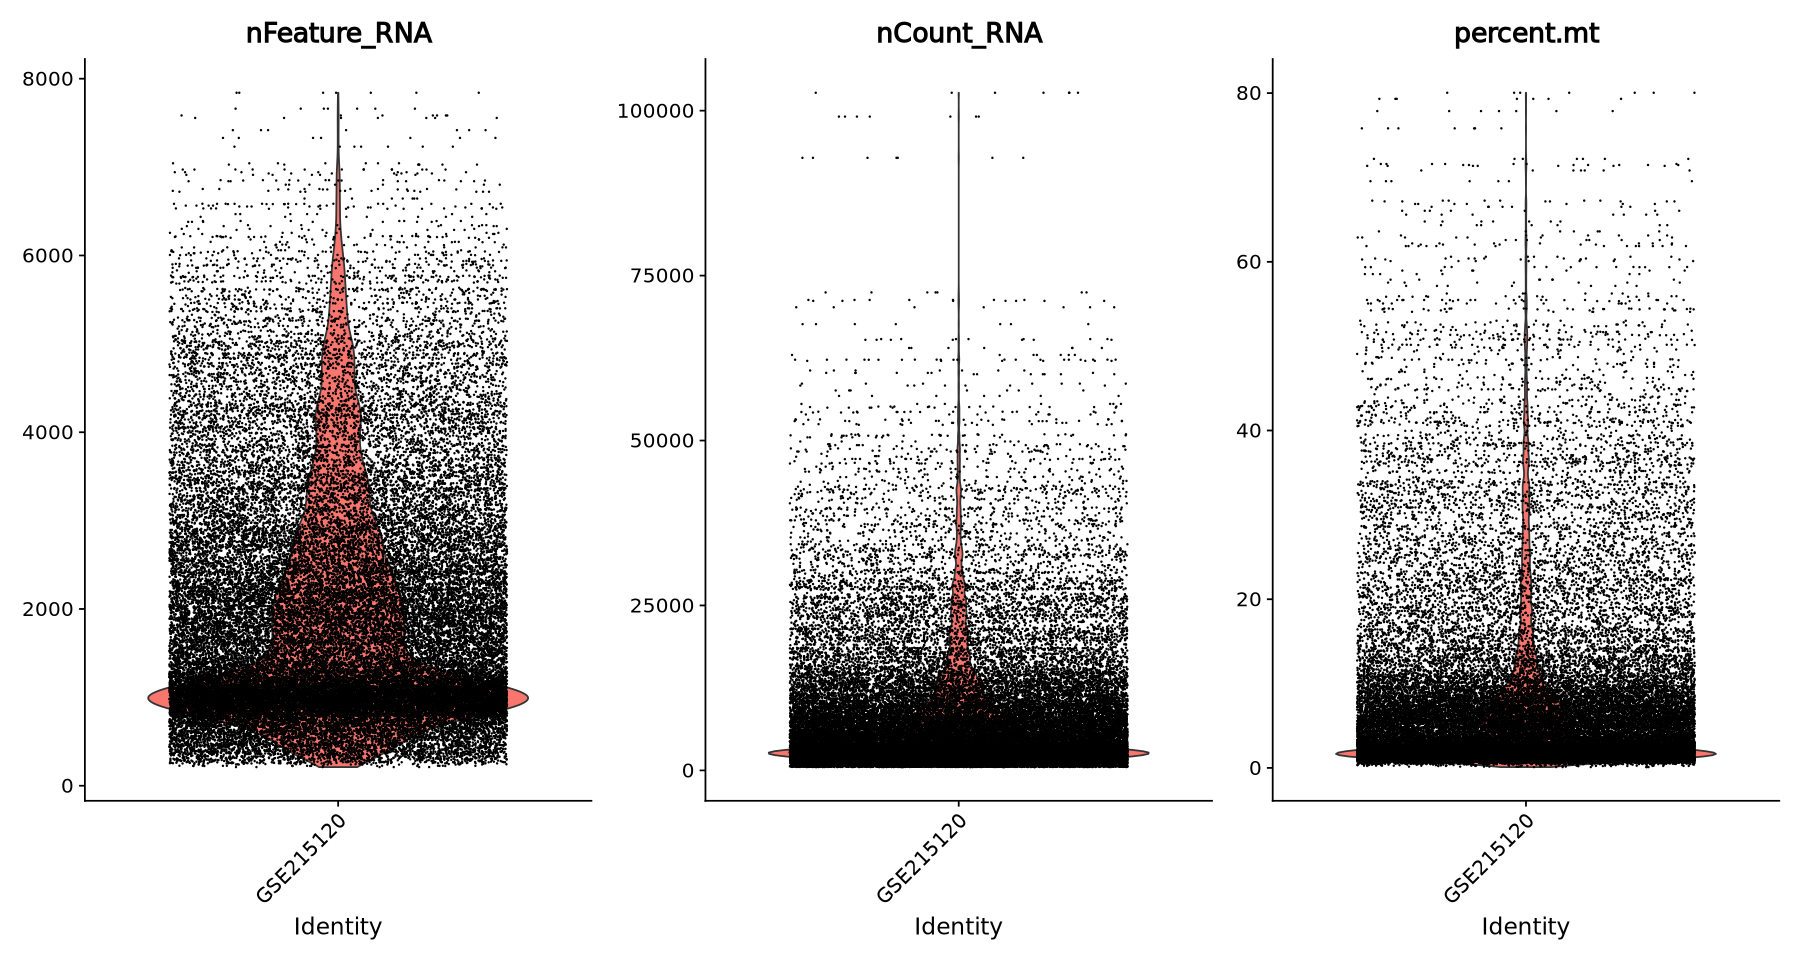

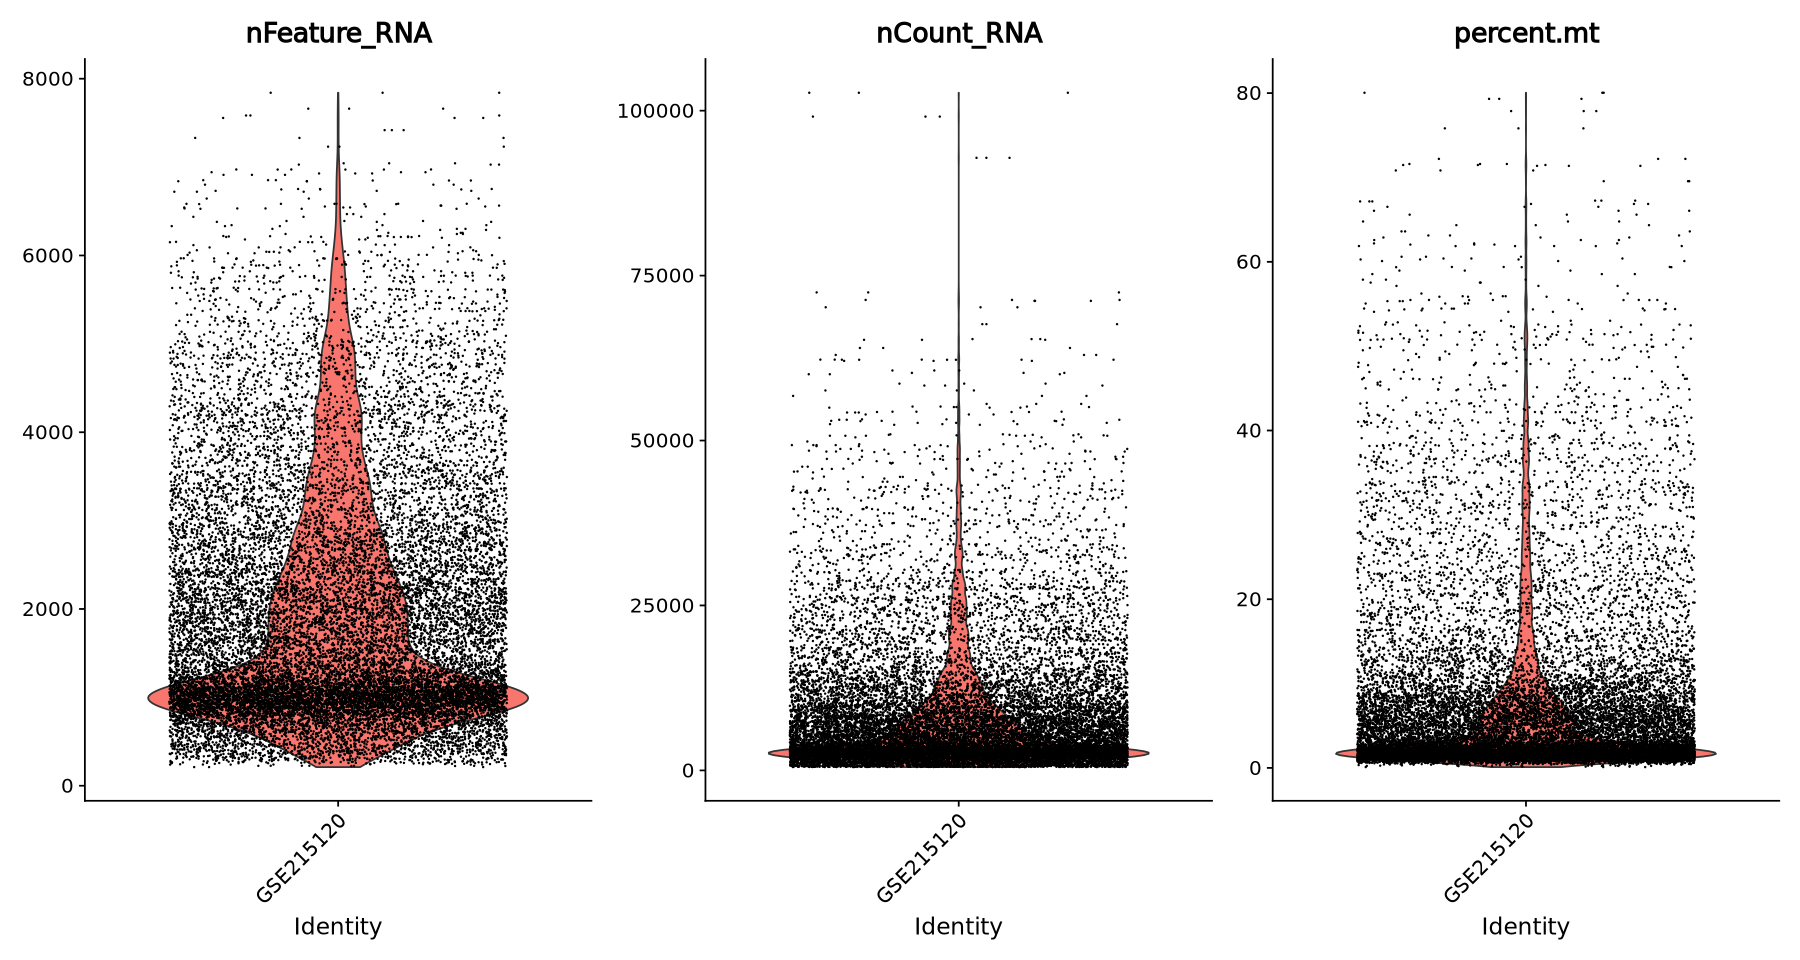

In [12]:
#QC Steps 
AcMEL[["percent.mt"]] <- PercentageFeatureSet(AcMEL, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(AcMEL, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

#QC Steps 
CuMEL[["percent.mt"]] <- PercentageFeatureSet(CuMEL, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(CuMEL, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
AcMEL <- JoinLayers(AcMEL)
CuMEL <- JoinLayers(CuMEL)

In [14]:
#Normalise the data
AcMEL <- NormalizeData(AcMEL)
#Find variable features
AcMEL <- FindVariableFeatures(AcMEL, selection.method = "vst", nfeatures = 2000)
#Scale the data
AcMEL <- ScaleData(AcMEL, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
AcMEL <- RunPCA(AcMEL, features = VariableFeatures(object = AcMEL))

Normalizing layer: counts

Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  COL6A2, COL3A1, COL1A1, COL6A1, COL1A2, IGFBP4, C1R, PCOLCE, COL6A3, SOD3 
	   BGN, LUM, DCN, THY1, C1S, SERPINF1, POSTN, FBLN2, PLAC9, SERPING1 
	   MMP2, SPARC, PRRX1, COL5A1, VCAN, COL18A1, CALD1, MXRA8, TMEM176B, MFAP4 
Negative:  RGS1, NKG7, CORO1A, CCL5, ALOX5AP, GZMA, CD69, TRBC1, LCP1, GPR183 
	   GZMK, H2AFZ, CCL4, HMGA1, LSP1, GZMB, ITGB2, GPR65, CRTAM, ICOS 
	   TIGIT, NSG1, CXCR6, MLANA, AP1S2, PIR, CTAG2, PRF1, CCT2, SNCA 
PC_ 2 
Positive:  MLANA, NDUFC2, S100A1, CRYAB, PIR, TYRP1, CLNS1A, MT-CO3, GPR143, GSTP1 
	   NSG1, PMEL, GPM6B, SNCA, TSPAN10, PHACTR1, SYNGR1, APOE, TYR, PLP1 
	   QPCT, PRELP, MRPL21, LINC00518, HIST1H1C, DCT, NDUFB2, MITF, GLMP, TOMM7 
Negative:  PECAM1, RNASE1, RAMP2, PLVAP, ECSCR, NPDC1, CLEC14A, RAMP3, EMCN, TM4SF1 
	   CD74, IL3RA, ADGRL4, CALCRL, SOX18, ESAM, CD93, ENG, PCAT19, BCAM 


In [15]:
#Normalise the data
CuMEL <- NormalizeData(CuMEL)
#Find variable features
CuMEL <- FindVariableFeatures(CuMEL, selection.method = "vst", nfeatures = 2000)
#Scale the data
CuMEL <- ScaleData(CuMEL, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
CuMEL <- RunPCA(CuMEL, features = VariableFeatures(object = CuMEL))

Normalizing layer: counts



Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  COL6A2, COL3A1, COL1A1, COL6A1, COL1A2, IGFBP4, C1R, PCOLCE, COL6A3, SOD3 
	   BGN, LUM, DCN, THY1, C1S, SERPINF1, POSTN, FBLN2, PLAC9, SERPING1 
	   MMP2, SPARC, PRRX1, COL5A1, VCAN, COL18A1, CALD1, MXRA8, TMEM176B, MFAP4 
Negative:  RGS1, NKG7, CORO1A, CCL5, ALOX5AP, GZMA, CD69, TRBC1, LCP1, GPR183 
	   GZMK, H2AFZ, CCL4, HMGA1, LSP1, GZMB, ITGB2, GPR65, CRTAM, ICOS 
	   TIGIT, NSG1, CXCR6, MLANA, AP1S2, PIR, CTAG2, PRF1, CCT2, SNCA 
PC_ 2 
Positive:  MLANA, NDUFC2, S100A1, CRYAB, PIR, TYRP1, CLNS1A, MT-CO3, GPR143, GSTP1 
	   NSG1, PMEL, GPM6B, SNCA, TSPAN10, PHACTR1, SYNGR1, APOE, TYR, PLP1 
	   QPCT, PRELP, MRPL21, LINC00518, HIST1H1C, DCT, NDUFB2, MITF, GLMP, TOMM7 
Negative:  PECAM1, RNASE1, RAMP2, PLVAP, ECSCR, NPDC1, CLEC14A, RAMP3, EMCN, TM4SF1 
	   CD74, IL3RA, ADGRL4, CALCRL, SOX18, ESAM, CD93, ENG, PCAT19, BCAM 
	   FLT1, JAM2, A2M, MALL, 

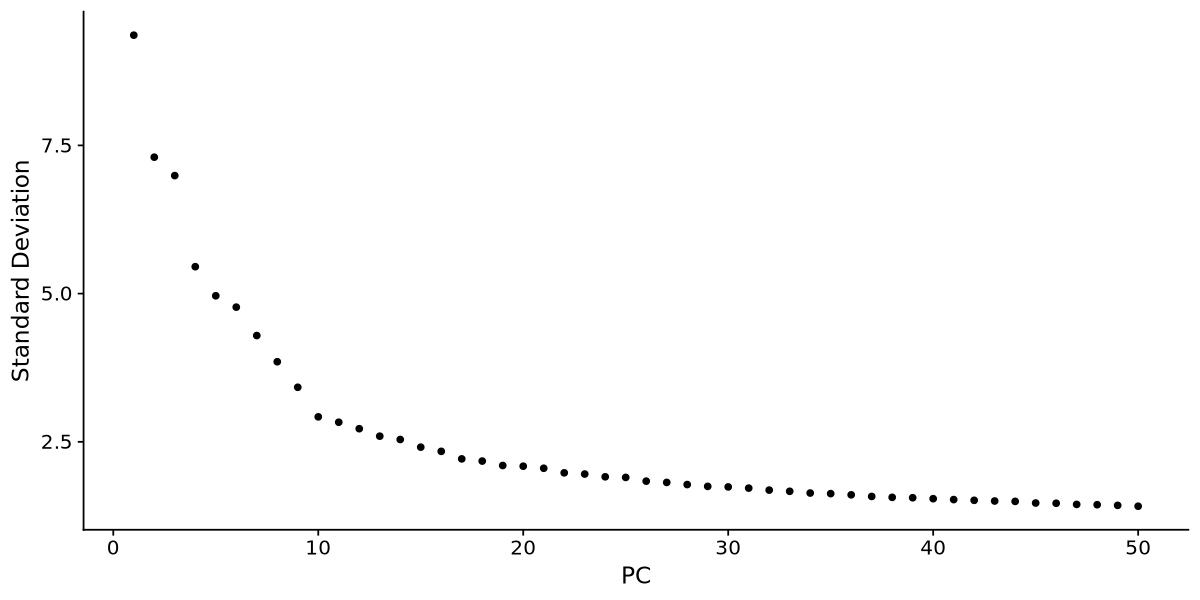

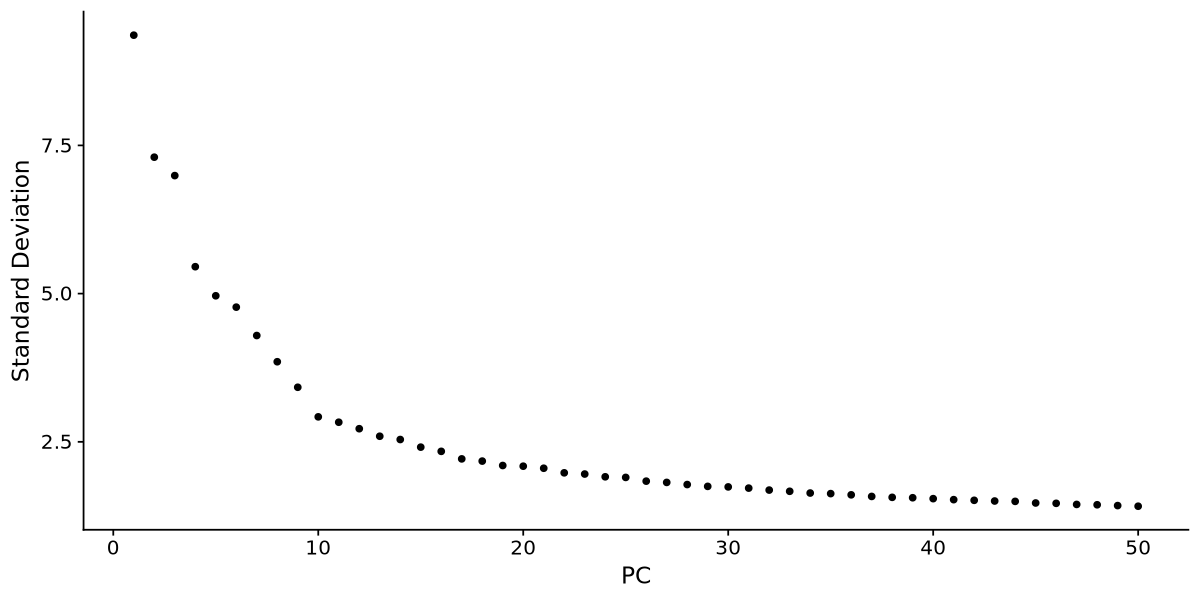

In [16]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(AcMEL, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

#make elbow plot
ElbowPlot(CuMEL, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [17]:
#Find neighbours (make sure number matches no. features chosen above)
AcMEL <- FindNeighbors(AcMEL, dims = 1:40)
CuMEL <- FindNeighbors(CuMEL, dims = 1:40)

Computing nearest neighbor graph



Computing SNN

Computing nearest neighbor graph

Computing SNN



In [18]:
#Run UMAP
AcMEL <- RunUMAP(AcMEL, dims = 1:40)
CuMEL <- RunUMAP(CuMEL, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:42:16 UMAP embedding parameters a = 0.9922 b = 1.112



08:42:16 Read 47005 rows and found 40 numeric columns

08:42:16 Using Annoy for neighbor search, n_neighbors = 30

08:42:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:42:21 Writing NN index file to temp file /scratch/temp/9441084/Rtmp3fTmBR/file1b9fa2504720b5

08:42:21 Searching Annoy index using 1 thread, search_k = 3000

08:42:43 Annoy recall = 100%

08:42:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:42:44 47005 smooth knn distance failures

08:42:46 Found 3 connected components, 
falling back to 'spca' initialization with init_sdev = 1

08:42:46 Using 'irlba' for PCA

08:42:47 PCA: 2 components explained 32.02% variance

08:42:47 Scaling init to sdev = 1

08:42:47 Commencing optimization for 200 epochs, with 

In [19]:
#Cluster, resolution here set to 0.2
AcMEL <- FindClusters(AcMEL, resolution = 0.2)
CuMEL <- FindClusters(CuMEL, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47005
Number of edges: 1605870

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9644
Number of communities: 33
Elapsed time: 2 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20145
Number of edges: 1115535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9483
Number of communities: 15
Elapsed time: 2 seconds


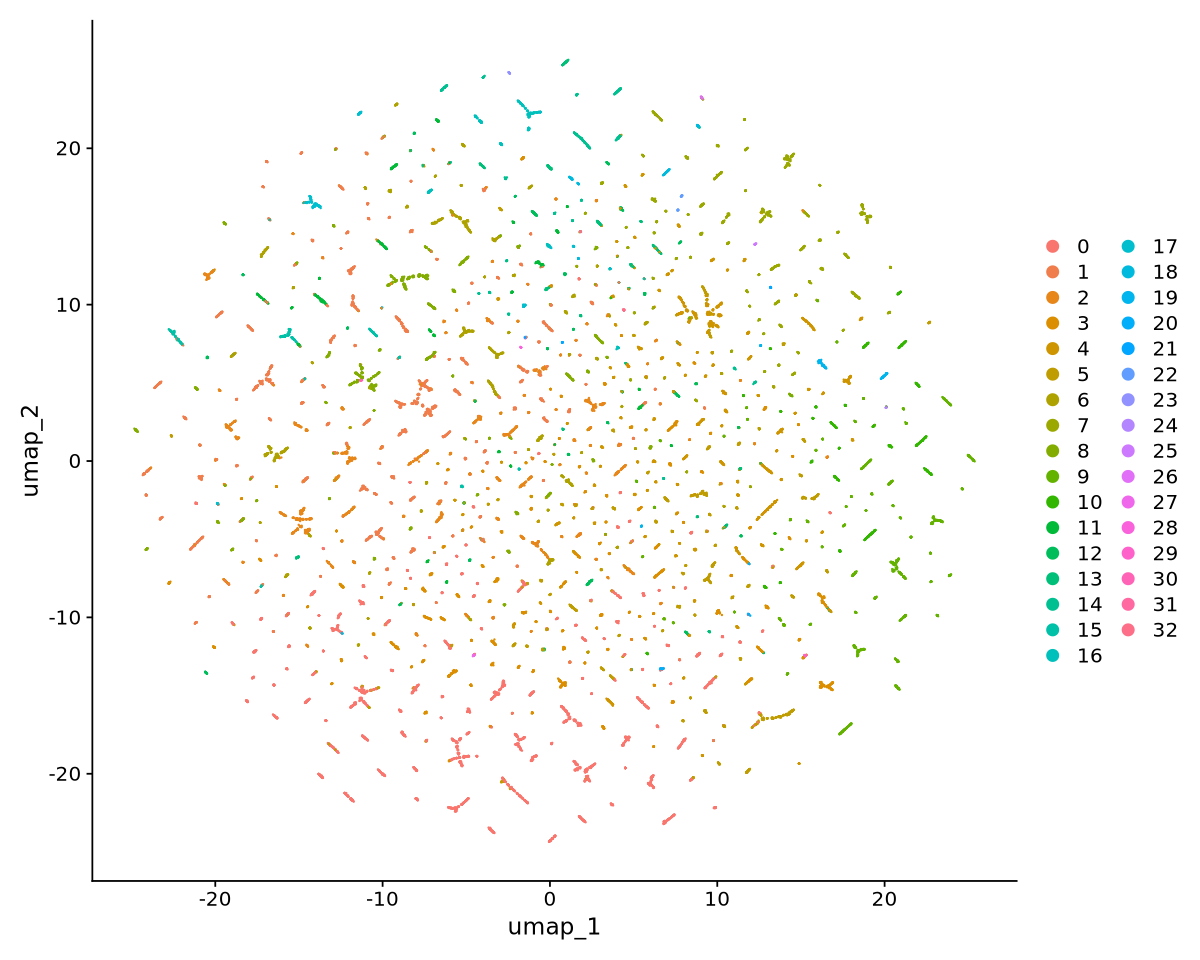

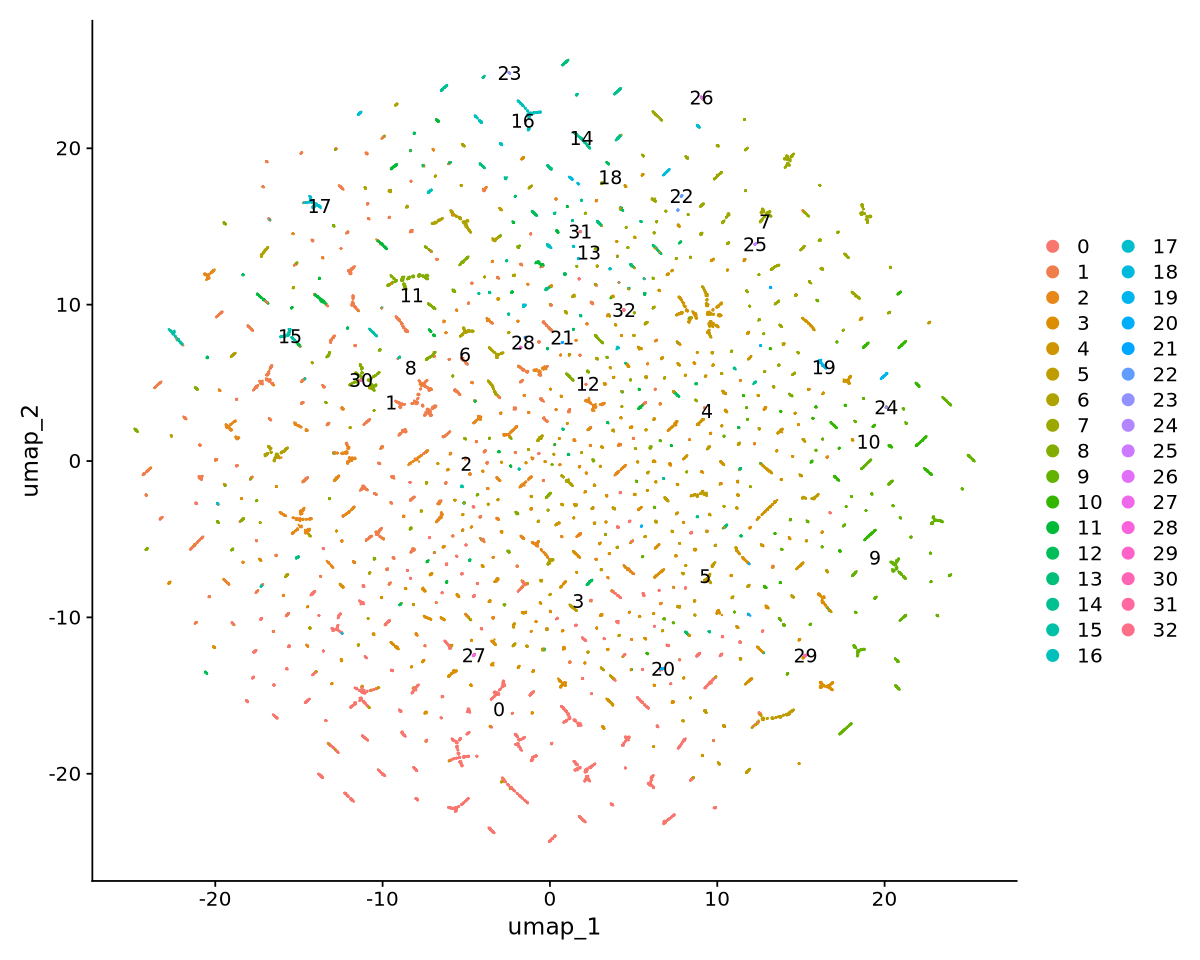

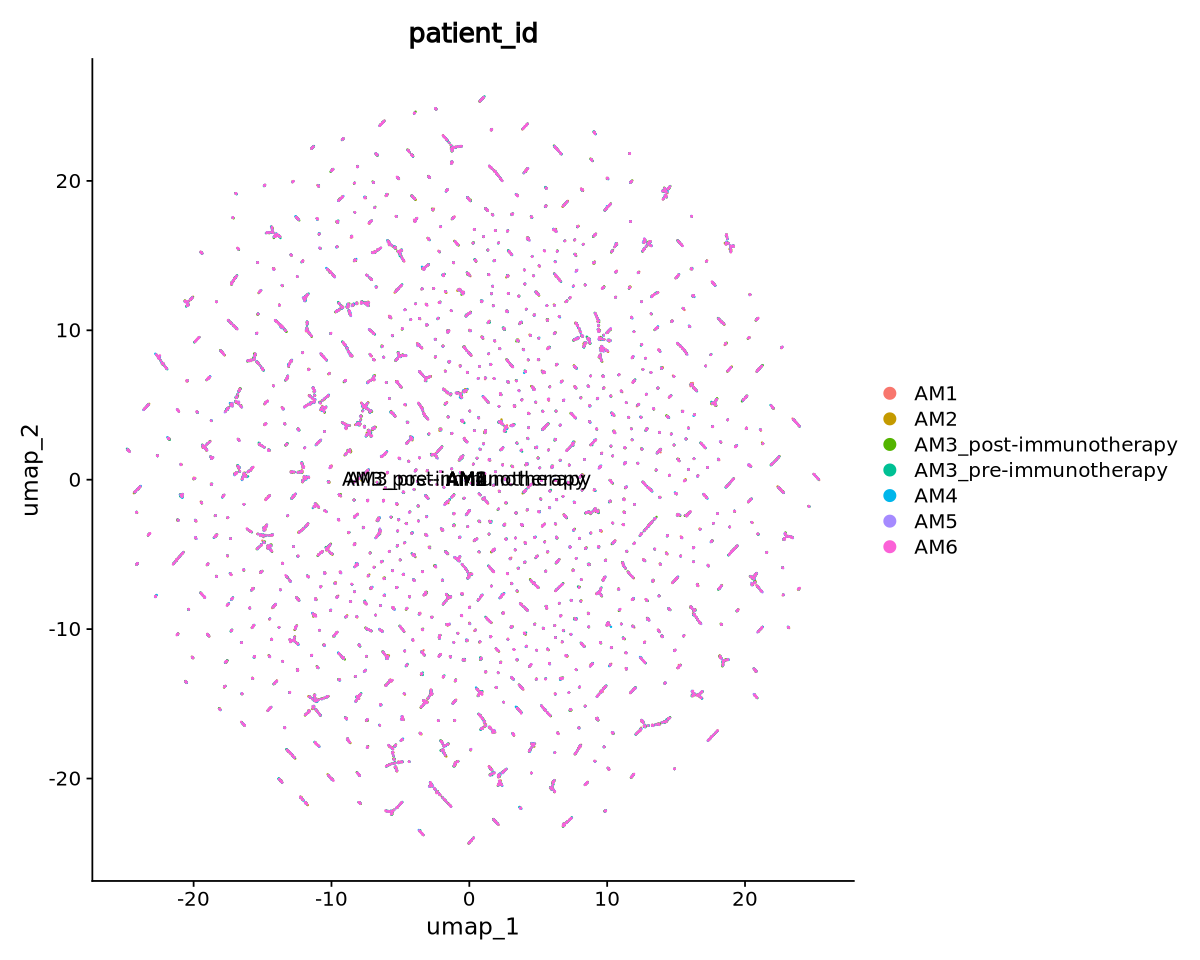

In [20]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(AcMEL, reduction = "umap")
DimPlot(AcMEL, reduction = "umap", label=TRUE)
DimPlot(AcMEL, reduction = "umap", label=TRUE, group = "patient_id")

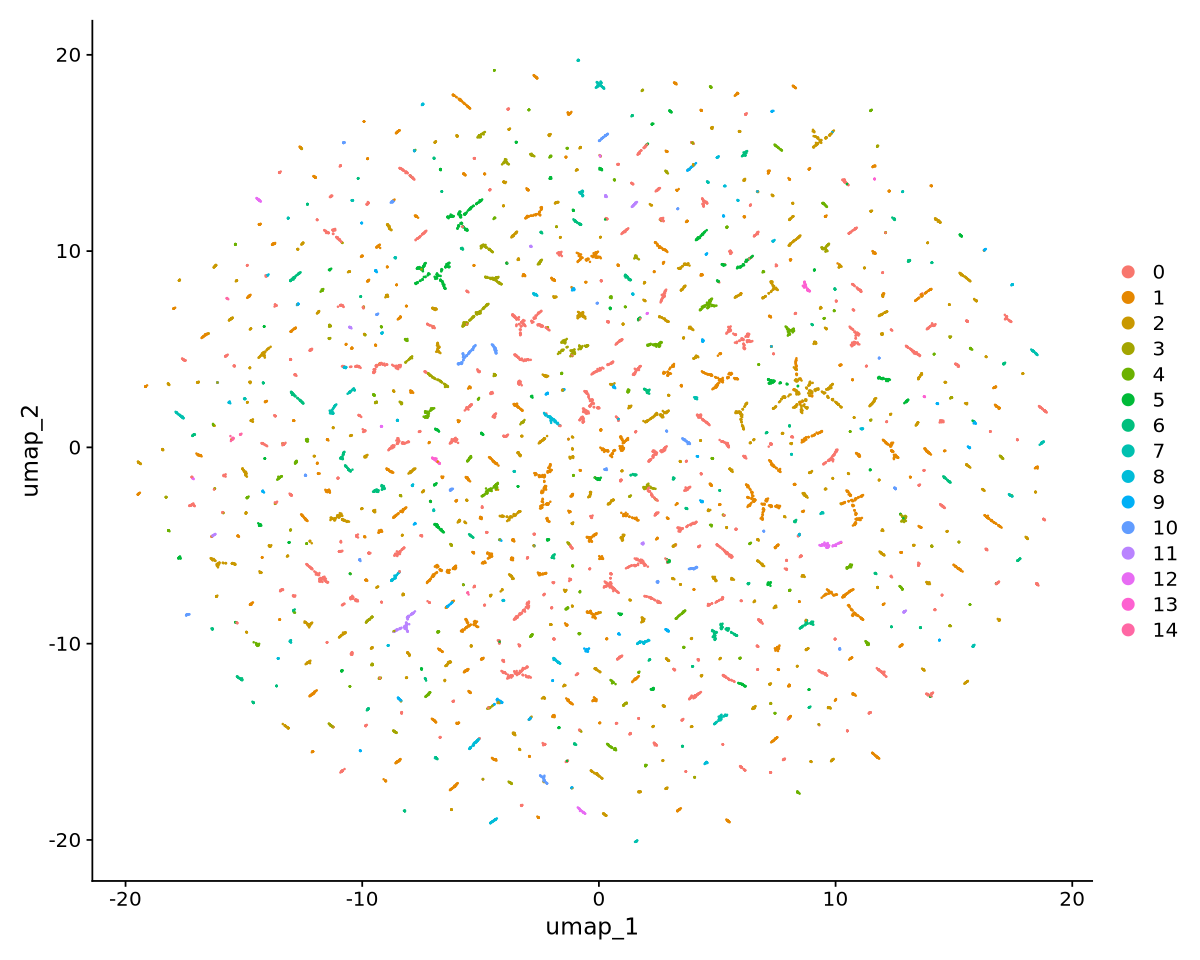

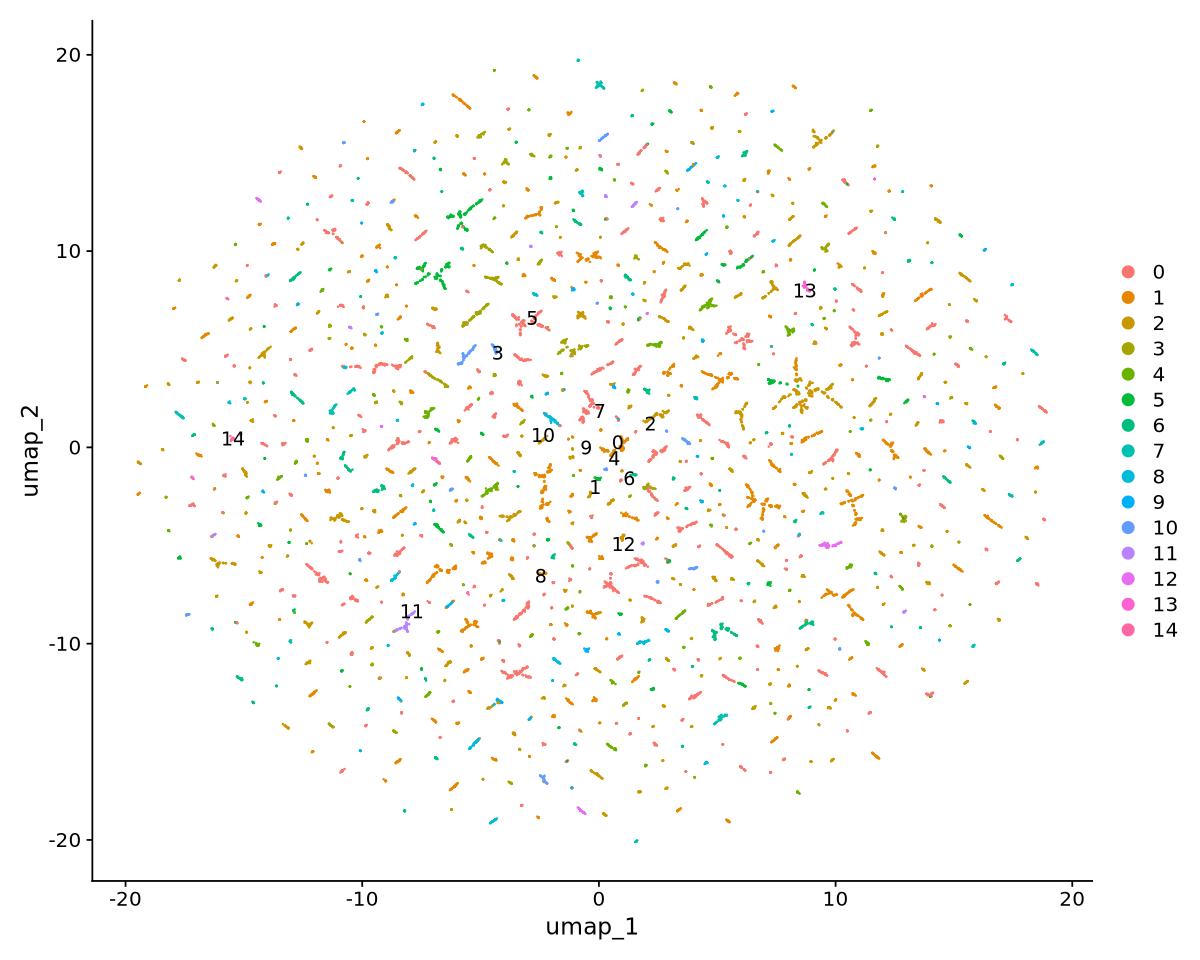

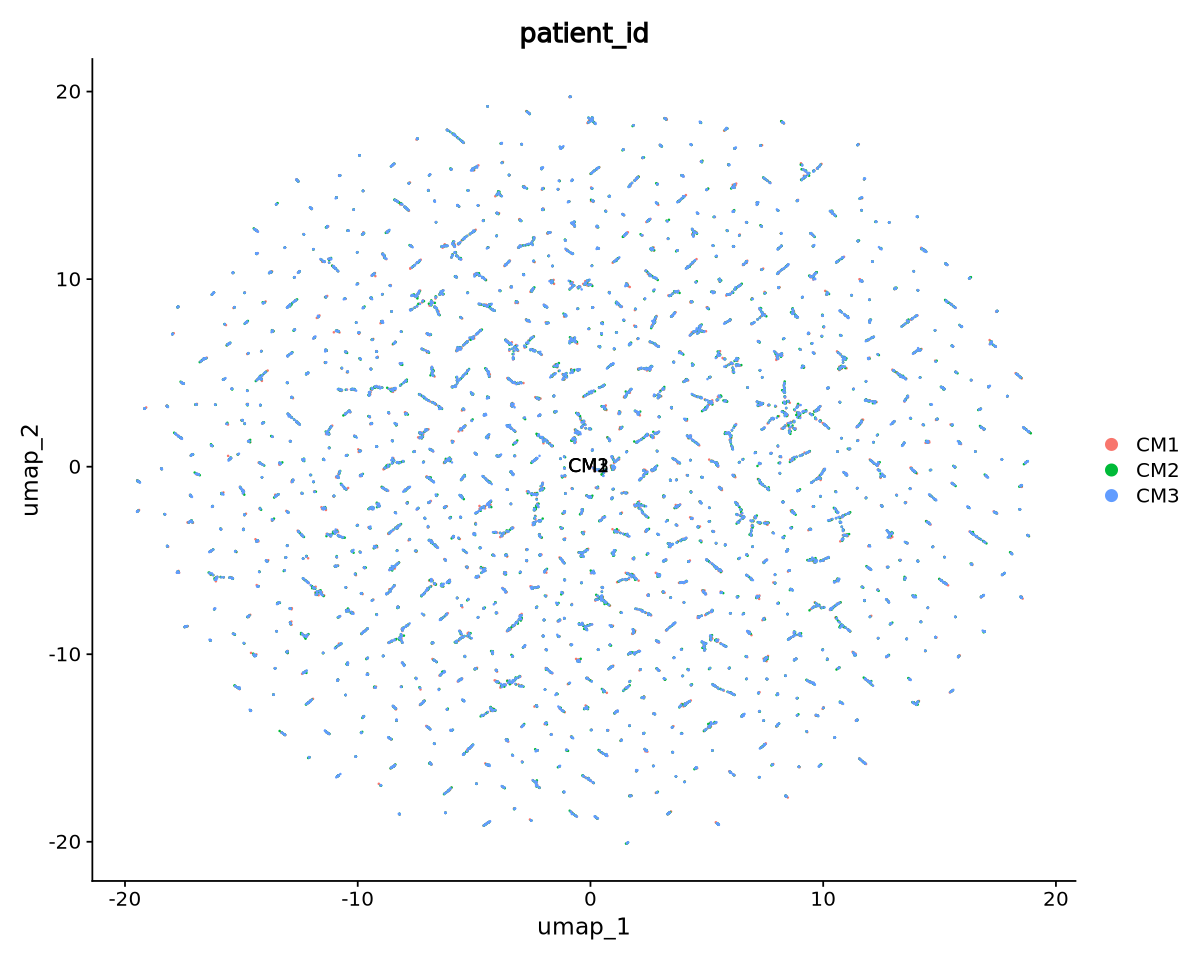

In [21]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(CuMEL, reduction = "umap")
DimPlot(CuMEL, reduction = "umap", label=TRUE)
DimPlot(CuMEL, reduction = "umap", label=TRUE, group = "patient_id")

## Here onwards not edited

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE184880/GSE184880.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

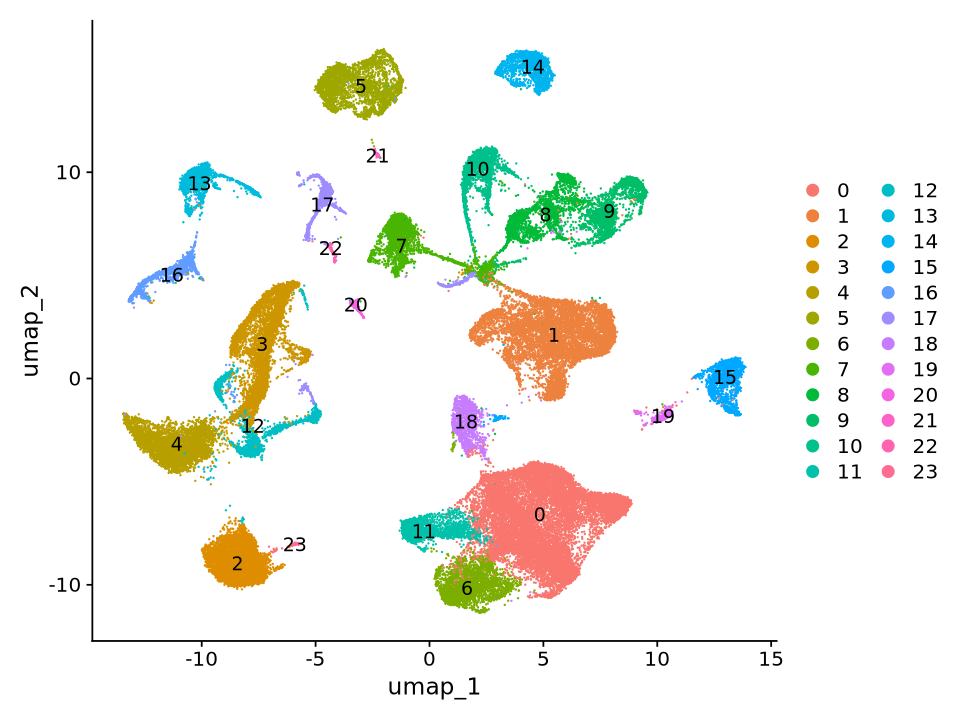

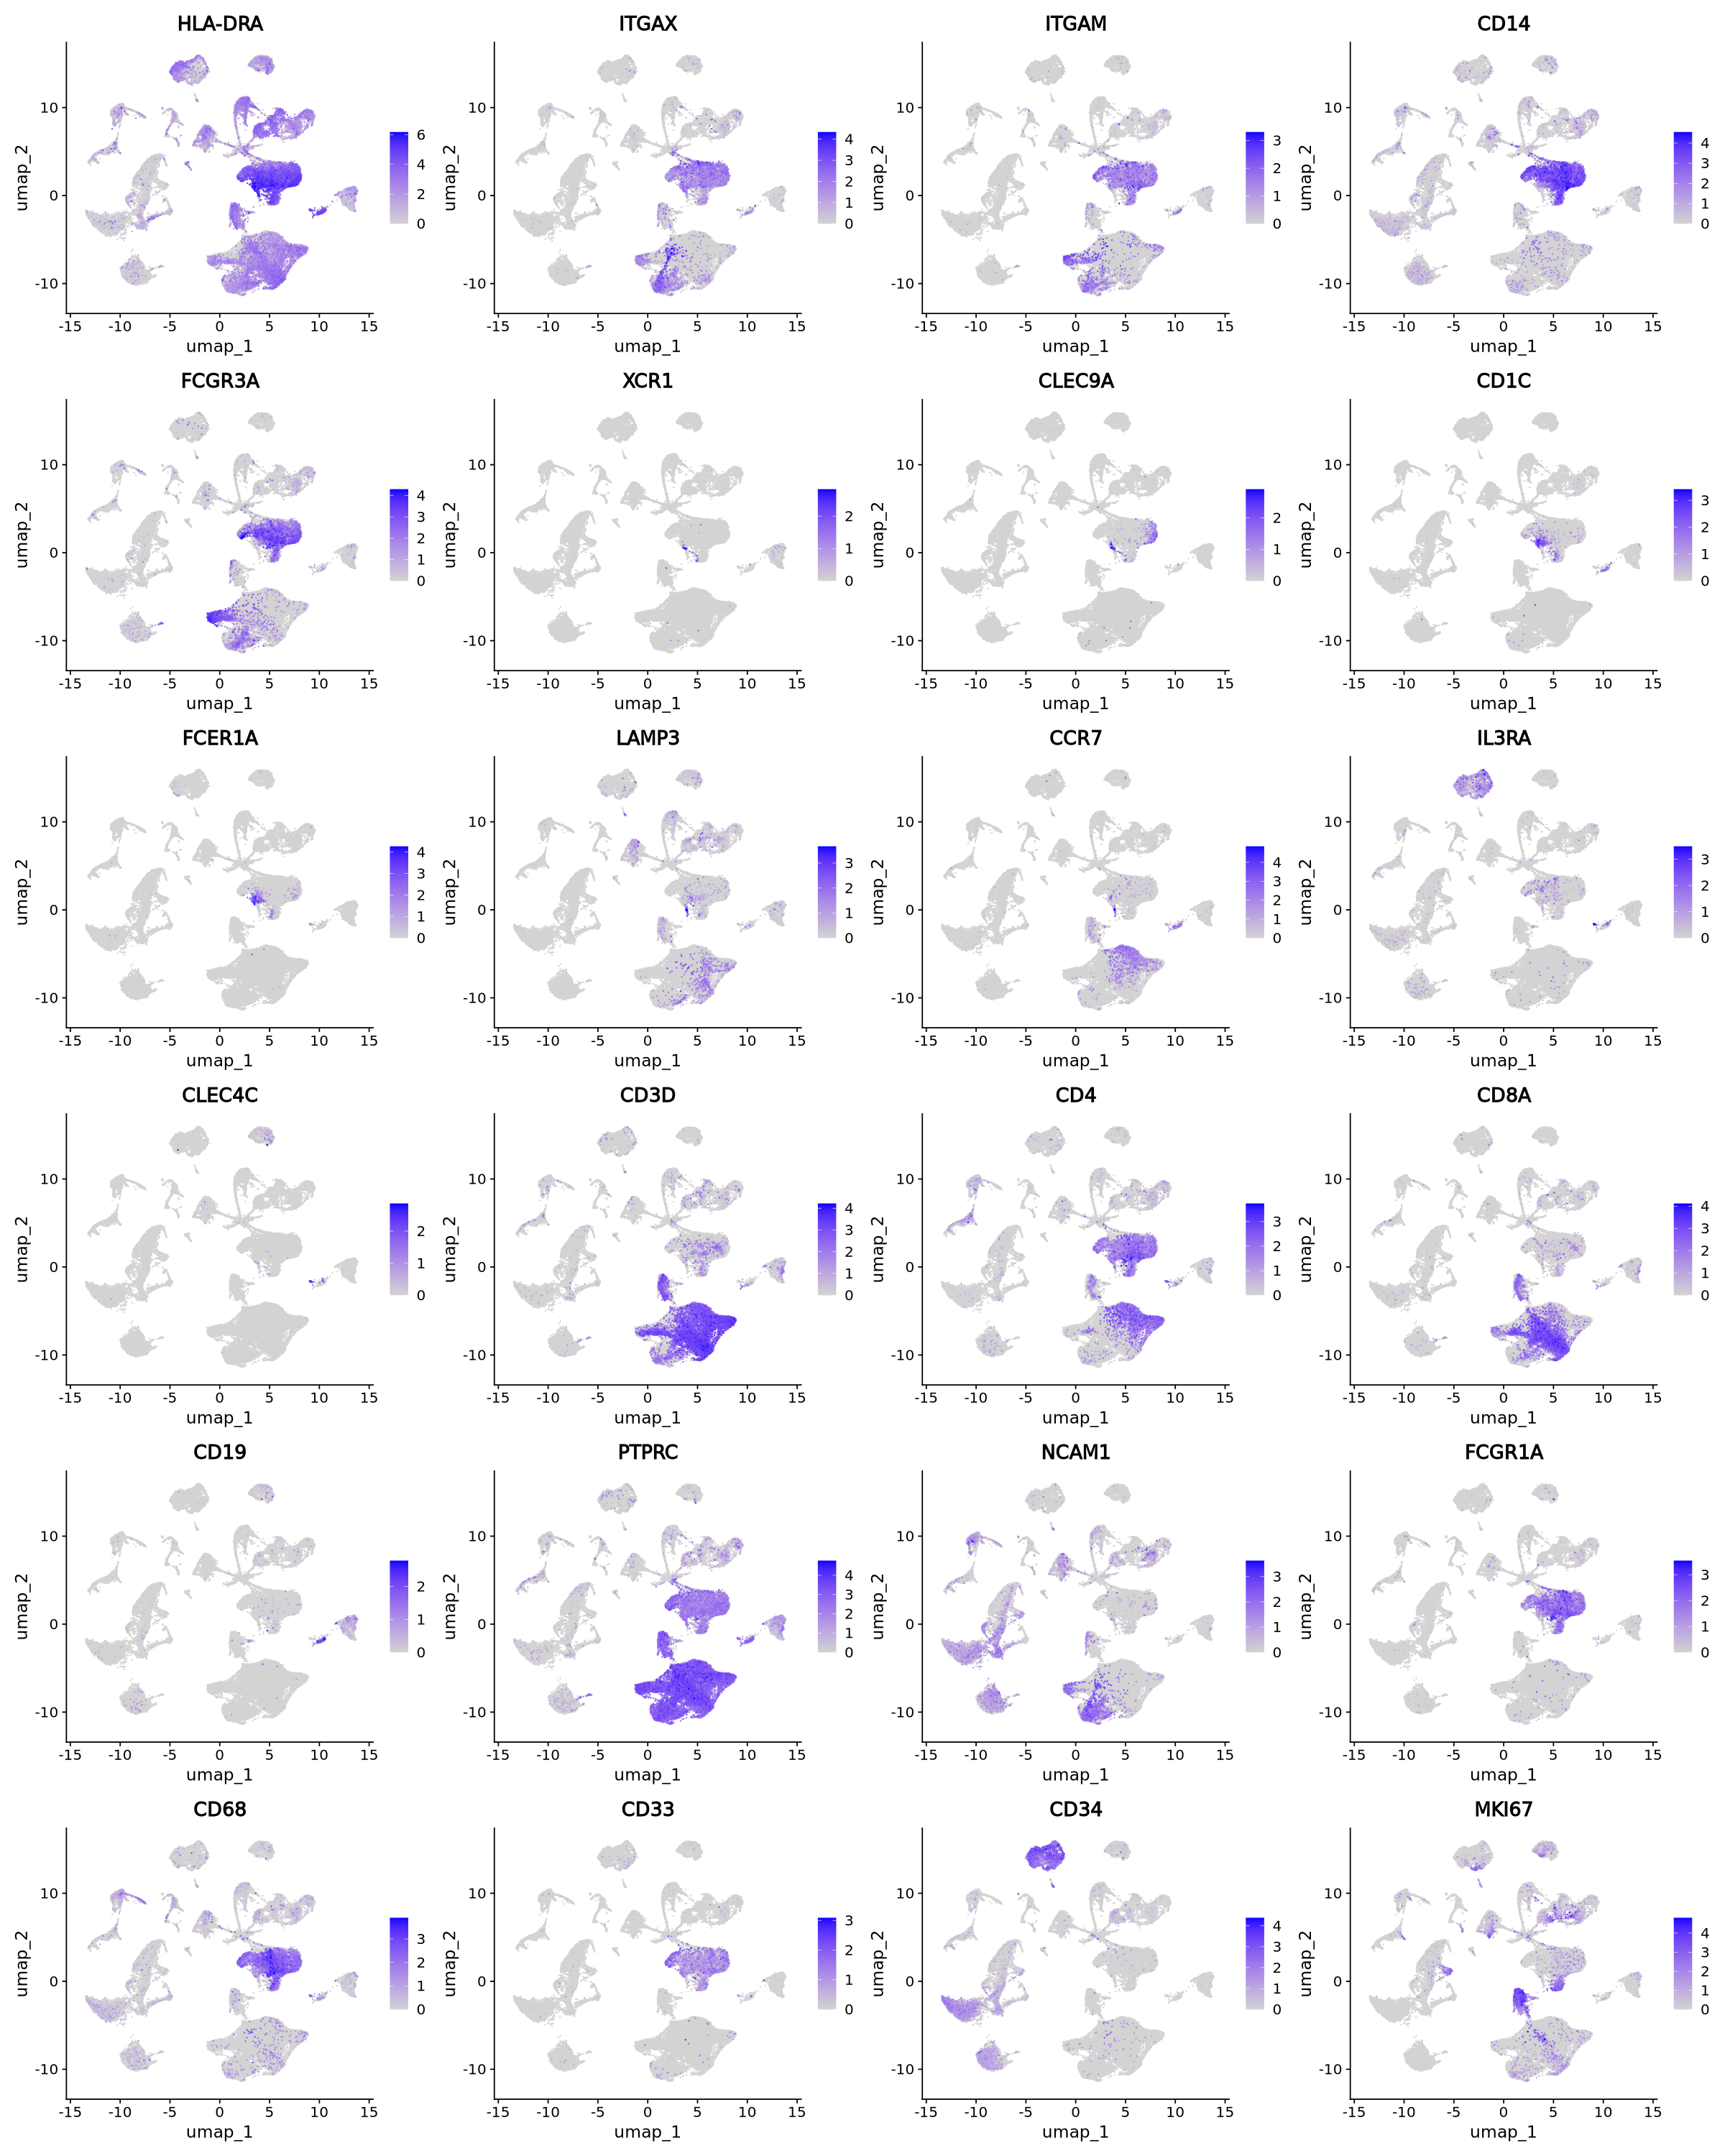

In [27]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

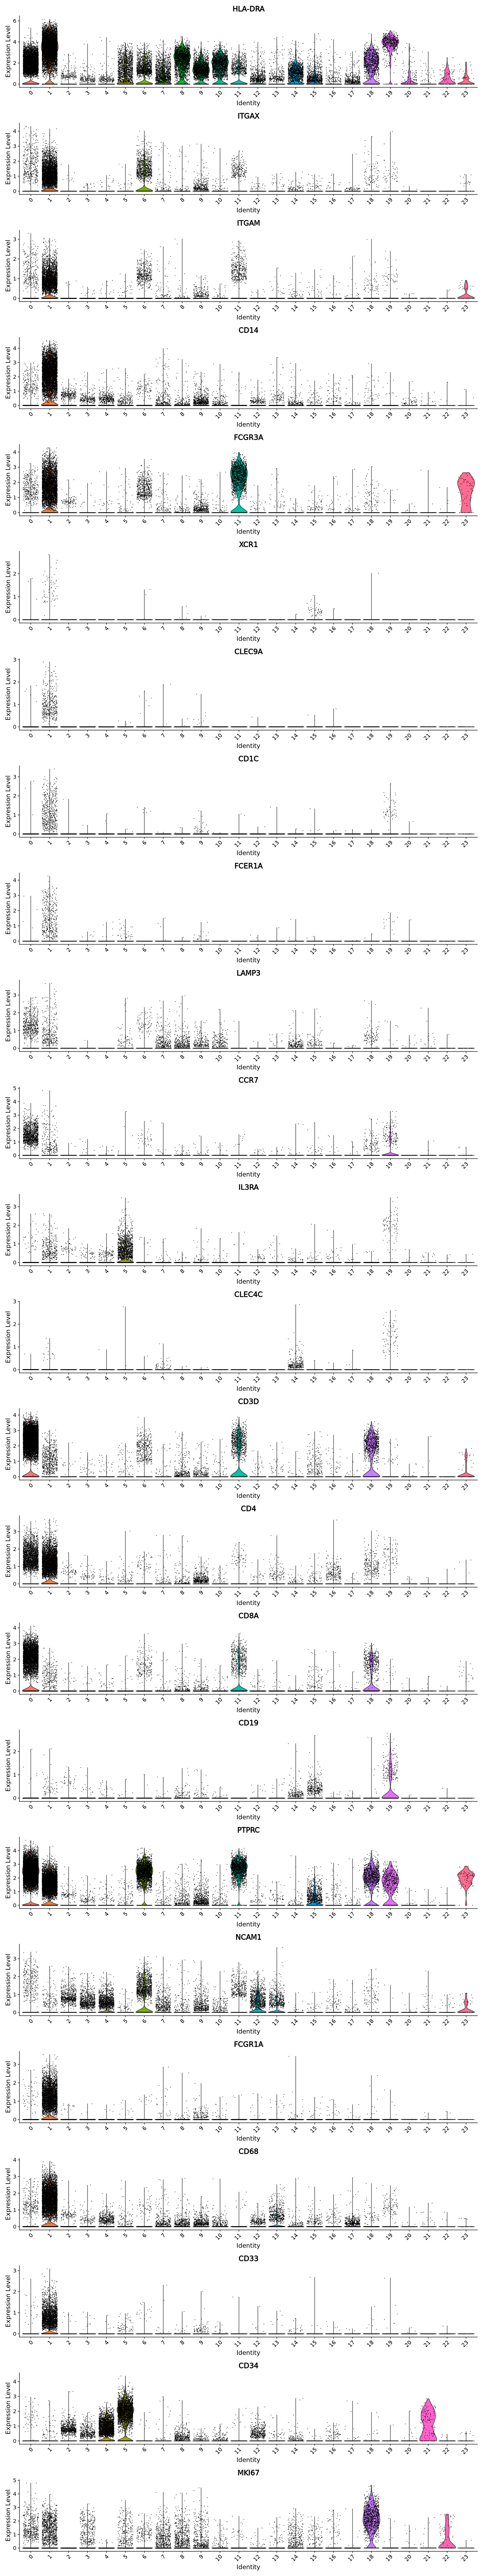

In [29]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

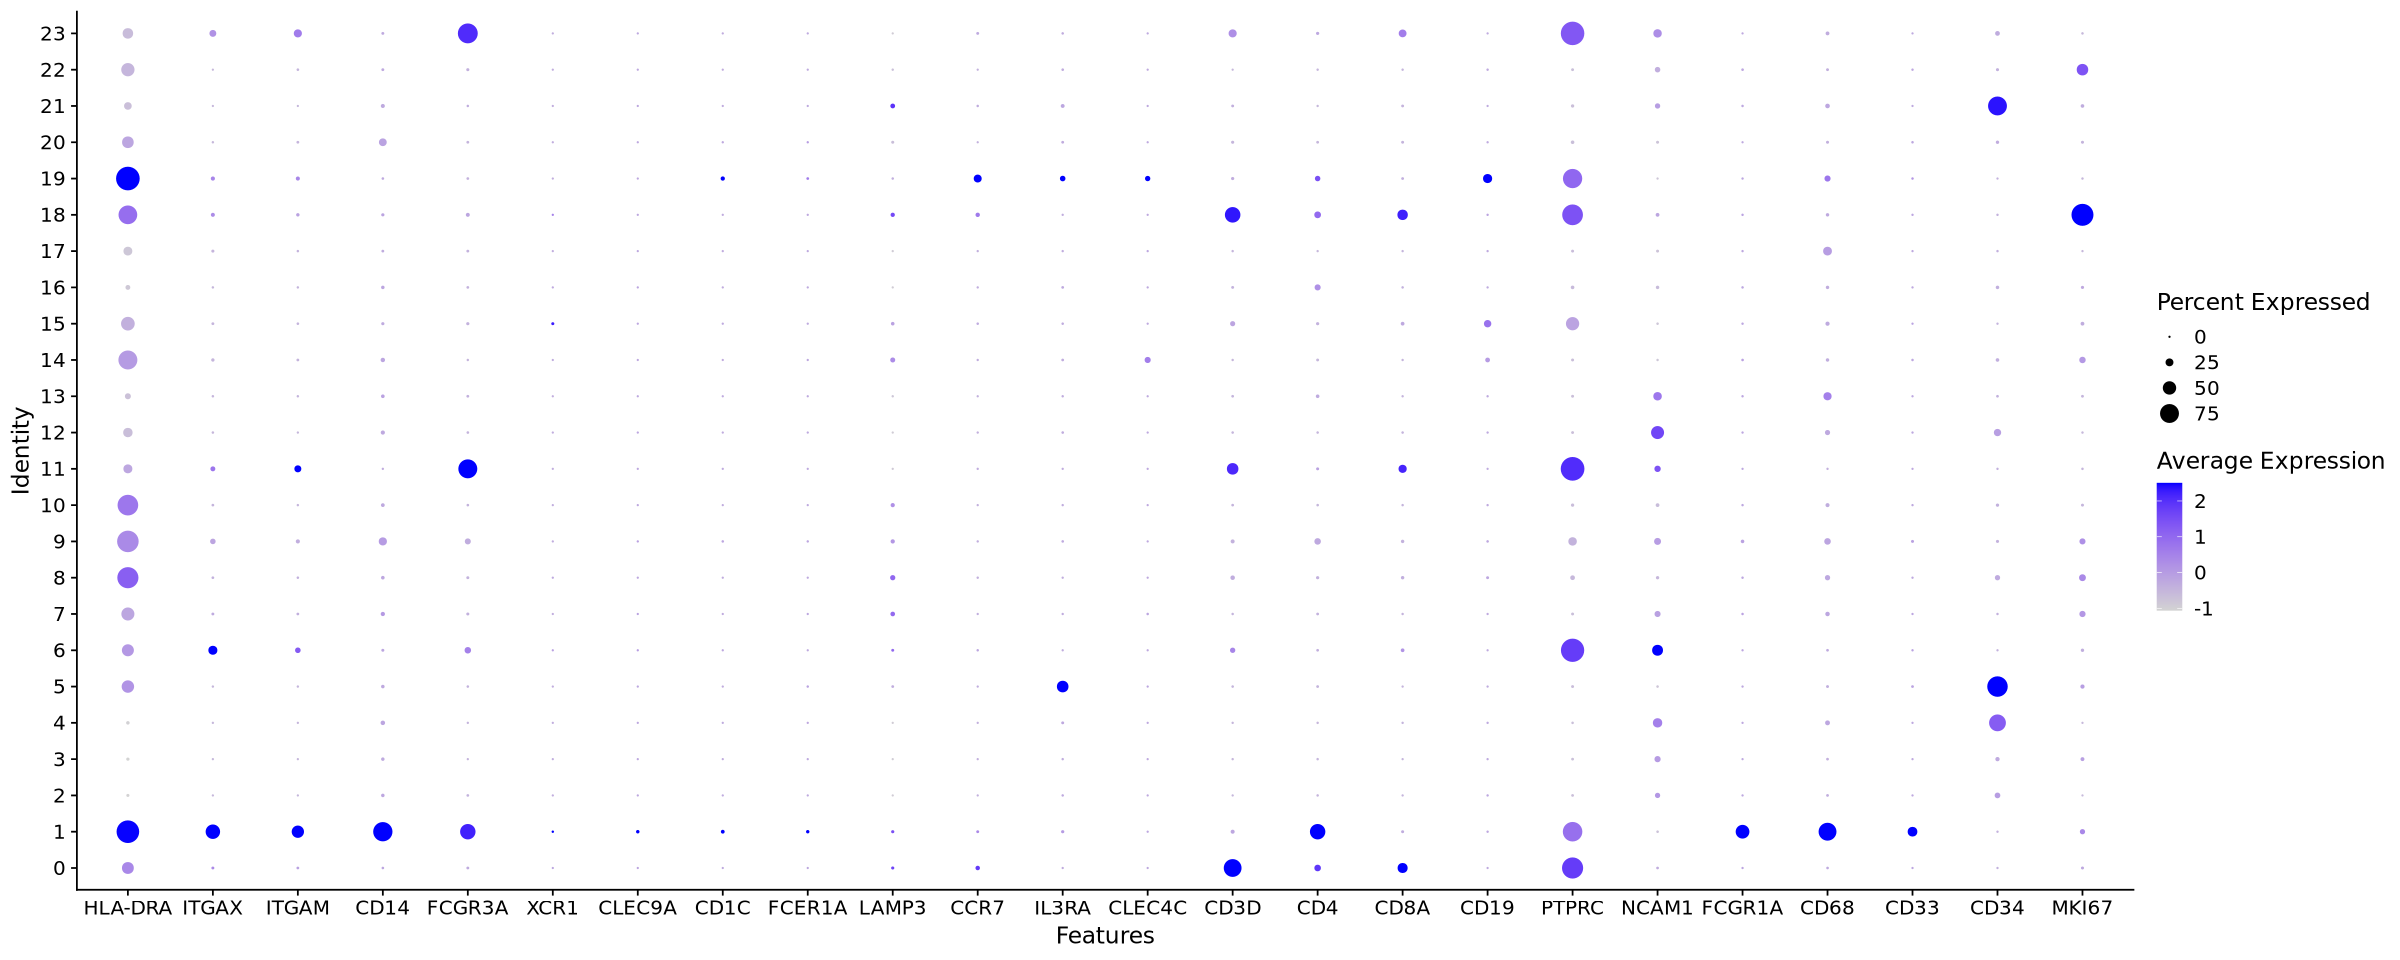

In [31]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [32]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id               percent.mt
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1  5.477032 
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1 38.377325 
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1 12.798362 
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1 15.980371 
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1  9.223978 
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1  8.837909 
                                     RNA_snn_res.0.2 seurat_clusters
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 0               0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 9               9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 9               9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 1               1              
GSE184880_Cancer1_AAACCCACATAACAGA-1 6               6              
GSE184880_Cancer1_AAACCCACATGACGGA-1 1               1

In [33]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [34]:
myeloid_OC

An object of class Seurat 
27984 features across 7799 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 25 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, scale.data
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE184880/GSE184880_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE184880/ /QRISdata/Q5935/nikita/scdata/GSE184880
```